# Bimodal Topic Model for Word Property Learning

## 0. Model Description

In [4]:
from IPython.display import display, Image

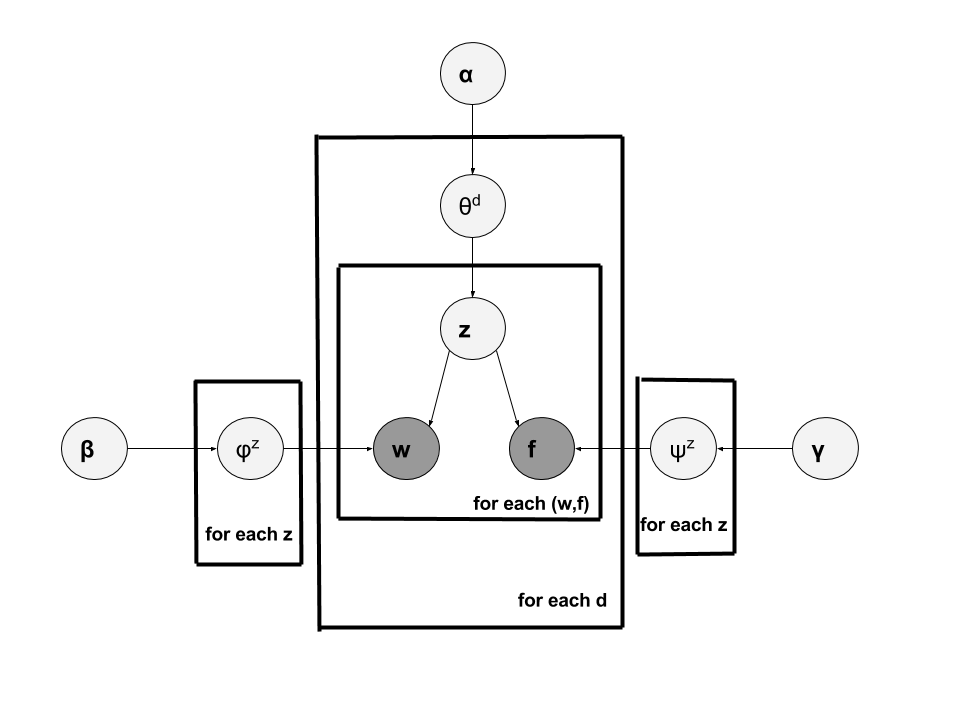

In [8]:
display(Image(filename='/Users/jacobsw/Desktop/UNIV/FALL_2016/LIN389C_RSCH_COMPLING/BAYESIAN/CODE_DRAFTS/FIGS/pgm_roller_andrews.png',width='50%'))

**Pr(word i assigned topic j | rest of the assignment except for word i)**

$\begin{align}P(z_i=j\mid \mathbf{z}_{-1},(w_i,f_i),d_i,\cdot) &= P(w_i\mid z_j)\cdot P(f_i\mid z_j)\cdot P(z_j\mid d)\\ &= \frac{1}{Z}\cdot\frac{C_{w_i,j}^{WT}+\beta}{\sum_{w=1}^WC_{w,j}^{WT}+W\beta}\cdot\frac{C_{f_i,j}^{FT}+\gamma}{\sum_{f=1}^FC_{f,j}^{FT}+F\gamma}\cdot\frac{C_{d_i,j}^{DT}+\alpha}{\sum_{t=1}^TC_{d_i,t}^{WT}+T\alpha}\end{align}$

$\quad\quad\quad\quad\quad\quad\quad\quad\text{where } Z = \sum_j \frac{C_{w_i,j}^{WT}+\beta}{\sum_{w=1}^WC_{w,j}^{WT}+W\beta}\cdot\frac{C_{f_i,j}^{FT}+\gamma}{\sum_{f=1}^FC_{f,j}^{FT}+F\gamma}\cdot\frac{C_{d_i,j}^{DT}+\alpha}{\sum_{t=1}^TC_{d_i,t}^{DT}+T\alpha}$

** Pr(topic j | document d); Pr(word i | topic j); Pr(feature i | topic j) **

$\theta_j^d = \frac{C_{d,j}^{DT}+\alpha}{\sum_{k=1}^TC_{d,k}^{DT}+T\alpha}$; $\quad\phi_i^j = \frac{C_{i,j}^{WT}+\beta}{\sum_{k=1}^WC_{k,j}^{WT}+W\beta}$; $\quad\psi_i^j = \frac{C_{i,j}^{FT}+\gamma}{\sum_{k=1}^FC_{k,j}^{FT}+F\gamma}$

## I. Modeling on Toy Example

### A. Fake Norms

In [254]:
import numpy as np

In [255]:
norms = ['cat','dog','pig','car','bike','train']
props = ['an_animal','purrs','has_4_legs','barks','is_cute',
         'used_for_transportation','honks','has_wheels','is_cool','is_big']
norm2prop = {'cat':['an_animal','purrs','has_4_legs'],
             'dog':['an_animal','barks','has_4_legs'],
             'pig':['an_animal','is_cute','has_4_legs'],
             'car':['used_for_transportation','honks','has_wheels'],
             'bike':['used_for_transportation','is_cool','has_wheels'],
             'train':['used_for_transportation','is_big','has_wheels']}
norm2propprob = {'cat':np.asarray([.33,.33,.33]),
                 'dog':np.asarray([.33,.33,.33]),
                 'pig':np.asarray([.33,.33,.33]),
                 'car':np.asarray([.33,.33,.33]),
                 'bike':np.asarray([.33,.33,.33]),
                 'train':np.asarray([.33,.33,.33])}

### B. Generate Fake Docs

In [256]:
import random

In [257]:
vocab1 = ['cat','dog','pig']
vocab2 = ['car','bike','train']

In [258]:
def sample_prop(norm, norm2prop, norm2propprob):
    return norm2prop[norm][np.argmax(np.random.multinomial(1, pvals=norm2propprob[norm]))]

In [276]:
def generate_docs(vocabs, topics, norm2prop, norm2propprob, freq=10):
    word_docs, prop_docs = [], []
    for vocab in vocabs:
        word_doc, prop_doc = [], []
        for word in vocab:
            for i in range(freq):
                topic = random.choice(topics)
                word_doc.append((word,topic))
                prop_doc.append((sample_prop(word, norm2prop, norm2propprob),topic))
        word_docs.append(word_doc)
        prop_docs.append(prop_doc)
    return word_docs, prop_docs  

In [277]:
word_docs, prop_docs = generate_docs([vocab1,vocab2],[0,1],norm2prop,norm2propprob)

In [278]:
for word_doc in word_docs:
    print word_doc; print

[('cat', 1), ('cat', 0), ('cat', 0), ('cat', 1), ('cat', 1), ('cat', 1), ('cat', 1), ('cat', 1), ('cat', 0), ('cat', 1), ('dog', 0), ('dog', 1), ('dog', 1), ('dog', 0), ('dog', 1), ('dog', 0), ('dog', 1), ('dog', 1), ('dog', 0), ('dog', 0), ('pig', 0), ('pig', 0), ('pig', 1), ('pig', 1), ('pig', 0), ('pig', 1), ('pig', 1), ('pig', 0), ('pig', 0), ('pig', 1)]

[('car', 0), ('car', 0), ('car', 1), ('car', 1), ('car', 0), ('car', 1), ('car', 0), ('car', 1), ('car', 1), ('car', 0), ('bike', 0), ('bike', 1), ('bike', 0), ('bike', 1), ('bike', 1), ('bike', 1), ('bike', 1), ('bike', 0), ('bike', 0), ('bike', 0), ('train', 0), ('train', 1), ('train', 0), ('train', 1), ('train', 1), ('train', 0), ('train', 0), ('train', 1), ('train', 0), ('train', 1)]



In [279]:
for prop_doc in prop_docs:
    print prop_doc; print

[('purrs', 1), ('has_4_legs', 0), ('an_animal', 0), ('an_animal', 1), ('has_4_legs', 1), ('has_4_legs', 1), ('has_4_legs', 1), ('an_animal', 1), ('has_4_legs', 0), ('has_4_legs', 1), ('an_animal', 0), ('an_animal', 1), ('an_animal', 1), ('has_4_legs', 0), ('barks', 1), ('barks', 0), ('has_4_legs', 1), ('has_4_legs', 1), ('barks', 0), ('has_4_legs', 0), ('has_4_legs', 0), ('has_4_legs', 0), ('is_cute', 1), ('an_animal', 1), ('has_4_legs', 0), ('has_4_legs', 1), ('has_4_legs', 1), ('is_cute', 0), ('is_cute', 0), ('an_animal', 1)]

[('used_for_transportation', 0), ('used_for_transportation', 0), ('honks', 1), ('honks', 1), ('has_wheels', 0), ('used_for_transportation', 1), ('honks', 0), ('honks', 1), ('has_wheels', 1), ('used_for_transportation', 0), ('used_for_transportation', 0), ('has_wheels', 1), ('used_for_transportation', 0), ('is_cool', 1), ('has_wheels', 1), ('used_for_transportation', 1), ('has_wheels', 1), ('has_wheels', 0), ('has_wheels', 0), ('used_for_transportation', 0), ('i

### C. Model Building

In [280]:
import pandas as pd

In [281]:
from __future__ import division
from operator import add
from collections import Counter

In [282]:
alpha, beta, gamma = 50/2, .001, .001

In [283]:
words, features = norms, props
w2i = {w:i for i,w in enumerate(words)}
f2i = {f:i for i,f in enumerate(features)}
topics = [0,1]
W, F, D, T = len(words), len(features), len(word_docs), len(topics)

In [284]:
def get_counts(word_docs,prop_docs):
    C_WT, C_FT, C_DT = np.zeros((W,T)), np.zeros((F,T)), np.zeros((D,T))
    wt_counts = reduce(add,[Counter(word_doc) for word_doc in word_docs])
    ft_counts = reduce(add,[Counter(prop_doc) for prop_doc in prop_docs])
    for (w,t_w),wt_count in wt_counts.iteritems(): C_WT[w2i[w]][t_w] = wt_count 
    for (f,t_f),ft_count in ft_counts.iteritems(): C_FT[f2i[f]][t_f] = ft_count
    for i,doc in enumerate(word_docs): # word,feature pairs have the same topic assignments.
        dt_counts = Counter([t for w,t in doc])
        for j in range(T):
            C_DT[i][j] = dt_counts[j]
    return C_WT, C_FT, C_DT

In [285]:
C_WT, C_FT, C_DT = get_counts(word_docs,prop_docs)

In [286]:
print pd.DataFrame(C_WT,index=words); print
print pd.DataFrame(C_FT,index=features); print
print pd.DataFrame(C_DT)

         0    1
cat    3.0  7.0
dog    5.0  5.0
pig    5.0  5.0
car    5.0  5.0
bike   5.0  5.0
train  5.0  5.0

                           0    1
an_animal                2.0  6.0
purrs                    0.0  1.0
has_4_legs               7.0  8.0
barks                    2.0  1.0
is_cute                  2.0  1.0
used_for_transportation  7.0  5.0
honks                    1.0  3.0
has_wheels               4.0  5.0
is_cool                  0.0  1.0
is_big                   3.0  1.0

      0     1
0  13.0  17.0
1  15.0  15.0


In [270]:
print C_WT.sum(), C_FT.sum(), C_DT.sum() # confirmation

60.0 60.0 60.0


In [271]:
def sample_topic(w_i,f_i,d): # w_i,f_i: indices of word-feature pair at ith pos in d.
    # compute normalizing constant
    Z = sum( ((C_WT[w_i][k]+beta) / (sum(C_WT[w][k] for w in xrange(W))+W*beta)) * \
             ((C_FT[f_i][k]+gamma) / (sum(C_FT[f][k] for f in xrange(F))+F*gamma)) * \
             ((C_DT[d][k]+alpha) / (sum(C_DT[d][t] for t in xrange(T))+T*alpha)) 
            for k in xrange(T))  
    # compute numerator (adapted from SG04:8,(3))
    P = [( ((C_WT[w_i][j]+beta) / (sum(C_WT[w][j] for w in xrange(W))+W*beta)) * \
           ((C_FT[f_i][j]+gamma) / (sum(C_FT[f][j] for f in xrange(F))+F*gamma)) * \
           ((C_DT[d][j]+alpha) / (sum(C_DT[d][t] for t in xrange(T))+T*alpha)) ) / Z
          for j in xrange(T)]
    return np.random.choice(np.array(topics),p=np.array(P))

In [272]:
def gibbs(n_iters=1000, verbose_freq=100):
    for e in range(n_iters):
        if e!=0 and e%verbose_freq==0: print "@ %dth iteration" % e
        for d,(word_doc,prop_doc) in enumerate(zip(word_docs,prop_docs)):
            for (w,t),(f,_) in zip(word_doc,prop_doc): # a (w,f) pair have the same topic.
                if C_WT[w2i[w]][t]==0 or C_FT[f2i[f]][t]==0: continue
                C_WT[w2i[w]][t] -= 1
                C_FT[f2i[f]][t] -= 1
                C_DT[d][t] -= 1
                new_t = sample_topic(w2i[w],f2i[f],d)
                C_WT[w2i[w]][new_t] += 1
                C_FT[f2i[f]][new_t] += 1
                C_DT[d][new_t] += 1                

In [273]:
%%time
gibbs()

@ 100th iteration
@ 200th iteration
@ 300th iteration
@ 400th iteration
@ 500th iteration
@ 600th iteration
@ 700th iteration
@ 800th iteration
@ 900th iteration
CPU times: user 2.75 s, sys: 188 ms, total: 2.94 s
Wall time: 2.83 s


In [274]:
print pd.DataFrame(C_WT,index=words); print
print pd.DataFrame(C_FT,index=features); print
print pd.DataFrame(C_DT)

          0     1
cat     0.0  10.0
dog     3.0   7.0
pig     0.0  10.0
car    10.0   0.0
bike   10.0   0.0
train  10.0   0.0

                            0     1
an_animal                 0.0  12.0
purrs                     0.0   3.0
has_4_legs                0.0  10.0
barks                     3.0   0.0
is_cute                   0.0   2.0
used_for_transportation  10.0   0.0
honks                     4.0   0.0
has_wheels                6.0   0.0
is_cool                   4.0   0.0
is_big                    6.0   0.0

      0     1
0   3.0  27.0
1  30.0   0.0


## II. Modeling on Brown

In [41]:
import cPickle
import numpy as np
from nltk.corpus import brown
from spacy.en import English
from spacy.en import STOPWORDS
from collections import defaultdict

### A. Prepare Norms and Corpus

In [2]:
norms,norm2prop,norm2propprob,props = cPickle.load(open("/Users/jacobsw/Desktop/UNIV/FALL_2016/LIN389C_RSCH_COMPLING/BAYESIAN/DATA/MCRAE/mcare_norm_data.p",'rb'))

In [30]:
%%time
brown_sents = [unicode(' '.join(sent)) for sent in brown.sents()]
parser = English()
parsed_sents = [parser(sent) for sent in brown_sents]

CPU times: user 1min 37s, sys: 1.93 s, total: 1min 39s
Wall time: 1min 40s


In [31]:
def extract_dep_triples(parsed_sents):   
    triples = []
    for parsed_sent in parsed_sents:
        for token in parsed_sent:
            lemma_triple = (token.lemma_, token.dep_, token.head.lemma_)
            triples.append(lemma_triple)
    return triples

In [32]:
%%time
dep_triples = extract_dep_triples(parsed_sents)

CPU times: user 1.03 s, sys: 152 ms, total: 1.19 s
Wall time: 1.18 s


In [33]:
def make_vr2norm(norms,triples):
    norms_set = set(norms)
    vr2norm = defaultdict(list)
    for triple in triples:
        if triple[0] in norms_set and \
           (triple[1].endswith('subj') or triple[1].endswith('obj')) and \
            triple[2] not in STOPWORDS:
                vr2norm[(triple[2],triple[1])].append(triple[0])
    return vr2norm

In [34]:
%%time
vr2norm = make_vr2norm(norms,dep_triples)

CPU times: user 167 ms, sys: 9.45 ms, total: 176 ms
Wall time: 171 ms


In [231]:
vr2i = {(v,r):i for i,(v,r) in enumerate(vr2norm.iterkeys())}

### B. Make Pseudo-Documents

In [188]:
topics = range(100)

In [189]:
def sample_prop(norm,norm2prop,norm2propprob):
    return np.random.choice(norm2prop[norm],p=norm2propprob[norm])

In [190]:
def make_pseudo_docs(vr2norm,norm2prop,norm2propprob,topics):
    word_docs, prop_docs = [], []
    for v,r in vr2norm.iterkeys():
        word_doc, prop_doc = [], []
        for norm in vr2norm[(v,r)]:
            topic = np.random.choice(topics)
            word_doc.append((norm,topic))
            prop_doc.append((sample_prop(norm,norm2prop,norm2propprob),topic))
        
        word_docs.append(word_doc)
        prop_docs.append(prop_doc)
    return word_docs, prop_docs

In [191]:
%%time
word_docs, prop_docs = make_pseudo_docs(vr2norm, norm2prop, norm2propprob, topics)

CPU times: user 89 ms, sys: 8.73 ms, total: 97.8 ms
Wall time: 92.2 ms


In [192]:
print len(word_docs), len(prop_docs)

945 945


In [193]:
print word_docs[0]; print
print prop_docs[0]

[(u'squirrel', 36), (u'car', 24), (u'onion', 10), (u'building', 68), (u'building', 37), (u'chicken', 89), (u'horse', 86)]

[('has_a_bushy_tail', 36), ('a_vehicle', 24), ('eaten_in_soups', 10), ('made_of_brick', 68), ('used_for_work', 37), ('an_animal', 89), ('used_by_riding', 86)]


### C. Visualization Tools for TM

In [208]:
def sample_vis_docs(C_DT): # sample 10 documents, plot distribution over topics the by documents.
    doc_ids = random.sample(range(C_DT.shape[0]),10) # randomly sample 10 docs.
    print "Histogram over Topic by Doc"
    plt.subplots(figsize=(12,4))
    for i,doc_id in enumerate(doc_ids):
        plt.subplot(2,5,i+1)
        plt.tight_layout()
        plt.title("Doc %d" % doc_id)
        plt.ylim((0,10))
        plt.plot(C_DT[doc_id])

In [209]:
def sample_vis_topics(C_WT,C_FT): # sample 10 topics, plot distribution over words/properties by the topics.
    topic_ids = random.sample(range(C_WT.shape[1]),10) # randomly sample 10 docs.
    print "Histogram over %s by Topic" % 'Words'
    plt.subplots(figsize=(12,4))
    for i,topic_id in enumerate(topic_ids):
        plt.subplot(2,5,i+1)
        plt.tight_layout()
        plt.title("Topic %d (Words)" % topic_id)
        plt.ylim((0,10))
        plt.plot(C_WT[:,topic_id])
    plt.show()
    print
    print "Histogram over %s by Topic" % 'Properties'
    plt.subplots(figsize=(12,4))
    for i,topic_id in enumerate(topic_ids):
        plt.subplot(2,5,i+1)
        plt.tight_layout()
        plt.title("Topic %d (Properties)" % topic_id)
        plt.ylim((0,10))
        plt.plot(C_FT[:,topic_id]) 
    plt.show()

### D. Topic Modeling

In [210]:
import pandas as pd

In [211]:
from __future__ import division
from operator import add
from collections import Counter

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
alpha, beta, gamma = 50/2, .001, .001

In [214]:
words, features = norms, props
w2i = {w:i for i,w in enumerate(words)}
f2i = {f:i for i,f in enumerate(features)}
W, F, D, T = len(words), len(features), len(word_docs), len(topics)

In [215]:
def get_counts(word_docs,prop_docs):
    C_WT, C_FT, C_DT = np.zeros((W,T)), np.zeros((F,T)), np.zeros((D,T))
    wt_counts = reduce(add,[Counter(word_doc) for word_doc in word_docs])
    ft_counts = reduce(add,[Counter(prop_doc) for prop_doc in prop_docs])
    for (w,t_w),wt_count in wt_counts.iteritems(): C_WT[w2i[w]][t_w] = wt_count 
    for (f,t_f),ft_count in ft_counts.iteritems(): C_FT[f2i[f]][t_f] = ft_count
    for i,doc in enumerate(word_docs): # word,feature pairs have the same topic assignments.
        dt_counts = Counter([t for w,t in doc])
        for j in range(T):
            C_DT[i][j] = dt_counts[j]
    return C_WT, C_FT, C_DT

In [216]:
C_WT, C_FT, C_DT = get_counts(word_docs,prop_docs)

In [217]:
print "# words: %d | # properties: %d | # documents: %d | # topics: %d" % (W,F,D,T)

# words: 541 | # properties: 2526 | # documents: 945 | # topics: 100


In [218]:
print C_WT.sum(), C_FT.sum(), C_DT.sum() # confirmation

2366.0 2366.0 2366.0


Histogram over Topic by Doc


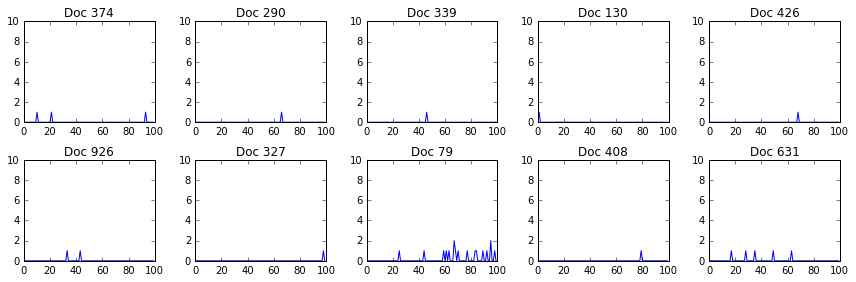

In [219]:
sample_vis_docs(C_DT)

Histogram over Words by Topic


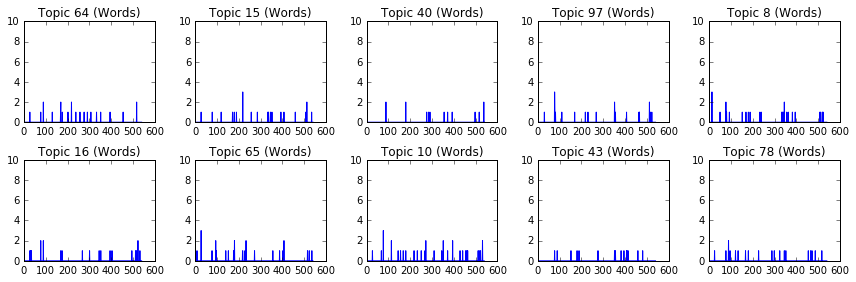


Histogram over Properties by Topic


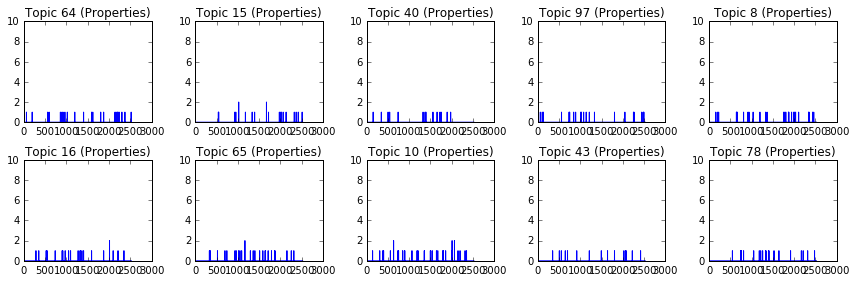

In [220]:
sample_vis_topics(C_WT,C_FT) # What it looks like on random initialization

In [221]:
def sample_topic(w_i,f_i,d): # w_i,f_i: indices of word-feature pair at ith pos in d.
    # compute normalizing constant
    Z = sum( ((C_WT[w_i][k]+beta) / (sum(C_WT[w][k] for w in xrange(W))+W*beta)) * \
             ((C_FT[f_i][k]+gamma) / (sum(C_FT[f][k] for f in xrange(F))+F*gamma)) * \
             ((C_DT[d][k]+alpha) / (sum(C_DT[d][t] for t in xrange(T))+T*alpha)) 
            for k in xrange(T))  
    # compute numerator (adapted from SG04:8,(3))
    P = [( ((C_WT[w_i][j]+beta) / (sum(C_WT[w][j] for w in xrange(W))+W*beta)) * \
           ((C_FT[f_i][j]+gamma) / (sum(C_FT[f][j] for f in xrange(F))+F*gamma)) * \
           ((C_DT[d][j]+alpha) / (sum(C_DT[d][t] for t in xrange(T))+T*alpha)) ) / Z
          for j in xrange(T)]
    return np.random.choice(np.array(topics),p=np.array(P))

In [222]:
def gibbs(n_iters=30, verbose_freq=5):
    for e in range(n_iters):
        if e!=0 and e%verbose_freq==0: print "@ %dth iteration" % e
        for d,(word_doc,prop_doc) in enumerate(zip(word_docs,prop_docs)):
            for (w,t),(f,_) in zip(word_doc,prop_doc): # a (w,f) pair have the same topic.
                if C_WT[w2i[w]][t]==0 or C_FT[f2i[f]][t]==0 or C_DT[d][t]==0: continue
                C_WT[w2i[w]][t] -= 1
                C_FT[f2i[f]][t] -= 1
                C_DT[d][t] -= 1
                new_t = sample_topic(w2i[w],f2i[f],d)
                C_WT[w2i[w]][new_t] += 1
                C_FT[f2i[f]][new_t] += 1
                C_DT[d][new_t] += 1    

In [223]:
%%time
gibbs()

@ 5th iteration
@ 10th iteration
@ 15th iteration
@ 20th iteration
@ 25th iteration
CPU times: user 39min 35s, sys: 11.4 s, total: 39min 47s
Wall time: 39min 44s


Histogram over Topic by Doc


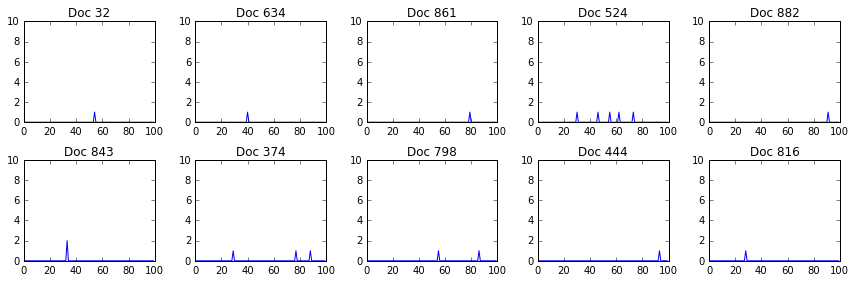

In [224]:
sample_vis_docs(C_DT)

Histogram over Words by Topic


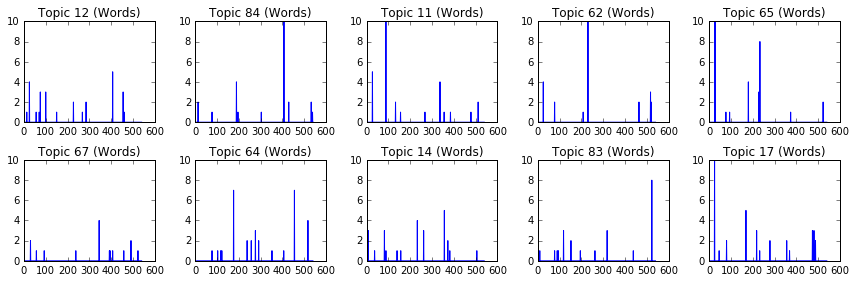


Histogram over Properties by Topic


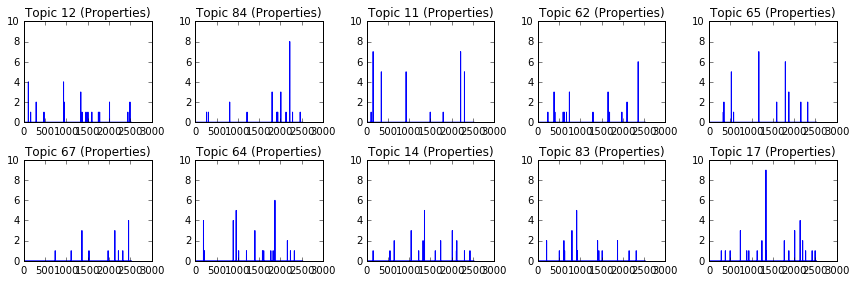

In [225]:
sample_vis_topics(C_WT,C_FT)

### E. Learning a Distribution over Properties for New Word

In [226]:
def p_f_given_z(f,z,C_FT): # f, z: indices of property and topic.
    return (C_FT[f][z]+gamma) / (C_FT[:,z].sum()+F*gamma)

def p_z_given_vr(z,d,C_DT): # z, d: indices of topic and document (corresponding to vr).
    return (C_DT[d][z]+alpha) / (C_DT[d,:].sum()+T*alpha)

def p_f_given_vr(f,d,C_FT,C_DT): 
    return sum(p_f_given_z(f,z,C_FT)*p_z_given_vr(z,d,C_DT) for z in topics)

In [246]:
def get_topk_props(u,d,k=5): # d: index of the document corresponds to vr pair observed for u.
    prop_dist = [p_f_given_vr(f2i[f],d,C_FT,C_DT) for f in features] # features: properties.
    topk = np.argsort(prop_dist)[:5]
    print "Top %d Properties for Word %s" % (k,u); print
    for i in topk:
        print "#%d Property: %s" % (i+1,features[i])
#     return map(lambda i:features[i], topk)

In [247]:
get_topk_props('alligator',vr2i[('feed','dobj')])

Top 5 Properties for Word alligator

#1 Property: used_for_wine
#1565 Property: has_black_spots
#1564 Property: found_in_cartoons
#1562 Property: a_small_horse
#1560 Property: inbeh_-_produces_honey


In [248]:
get_topk_props('ball',vr2i[('play','dobj')])

Top 5 Properties for Word ball

#1 Property: used_for_wine
#1565 Property: has_black_spots
#1564 Property: found_in_cartoons
#1562 Property: a_small_horse
#1560 Property: inbeh_-_produces_honey


In [249]:
vr2i[('play','dobj')]

447

In [250]:
vr2i[('feed','dobj')]

667